In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

%matplotlib inline

In [2]:
df=pd.read_csv("./data/diabetes_dataset.csv")
df


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


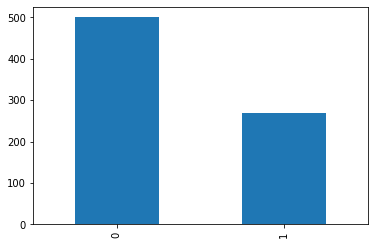

In [3]:
df["Outcome"].value_counts().plot(kind='bar')

In [4]:
df1=df.copy()

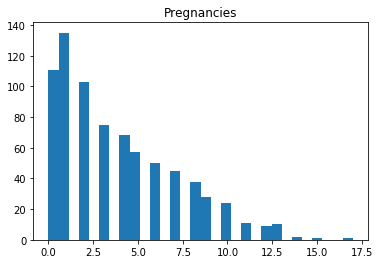

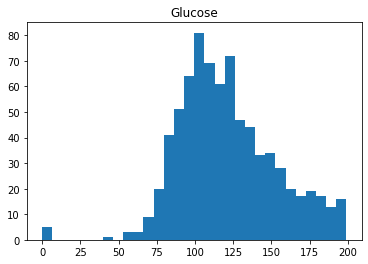

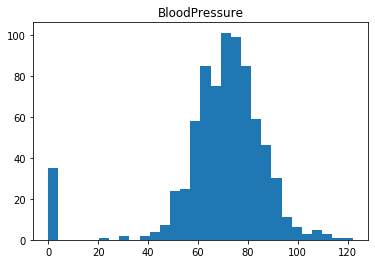

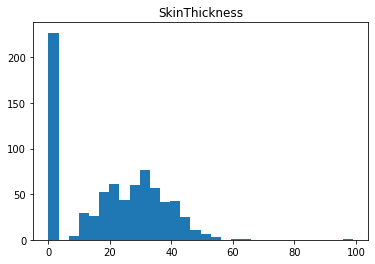

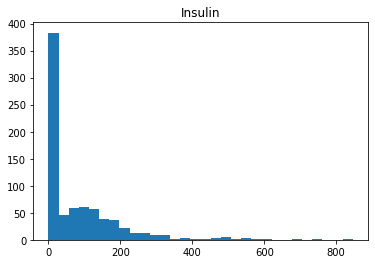

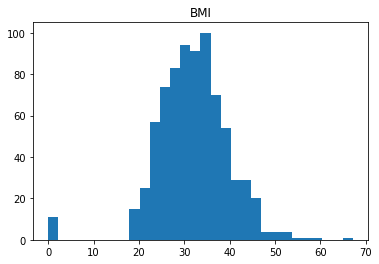

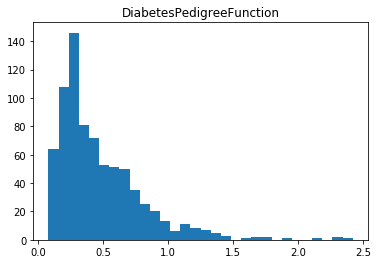

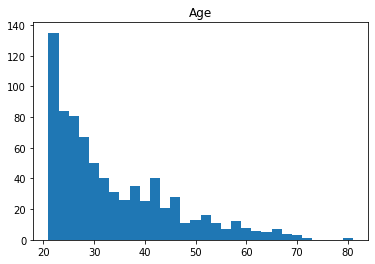

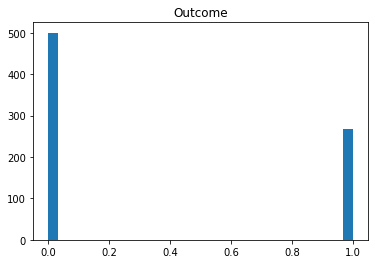

In [5]:
for i in df.columns:
    plt.figure()
    plt.title(i)
    plt.hist(df[i],bins=30)
    plt.show()

In [6]:
df["ins"]=np.where(df["Insulin"]==0,1,0)
print(df.groupby("ins")["Outcome"].mean())
df["sk"]=np.where(df["SkinThickness"]==0,1,0)
print(df.groupby("sk")["Outcome"].mean())

ins
0    0.329949
1    0.368984
Name: Outcome, dtype: float64
sk
0    0.332717
1    0.387665
Name: Outcome, dtype: float64


In [7]:
df["Glucose"]=np.where(df["Glucose"]==0,df["Glucose"].mean(),df["Glucose"])
df["BloodPressure"]=np.where(df["BloodPressure"]==0,df["BloodPressure"].mean(),df["BloodPressure"])
df["BMI"]=np.where(df["BMI"]==0,df["BMI"].mean(),df["BMI"])


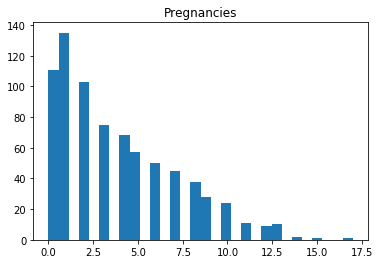

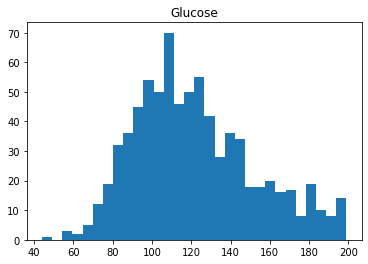

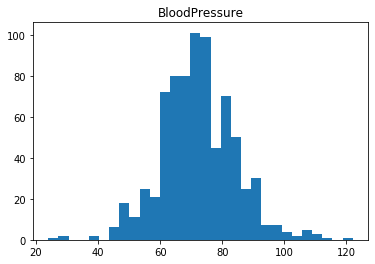

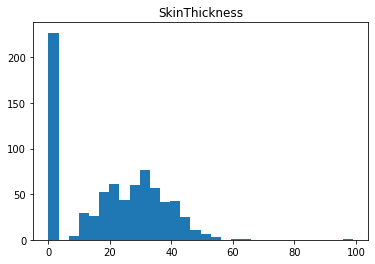

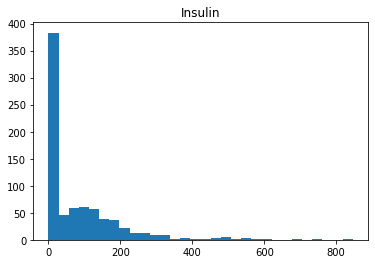

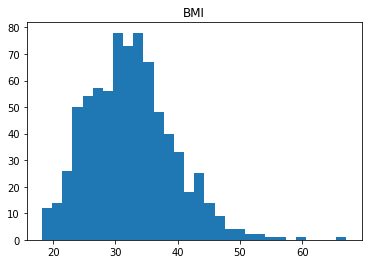

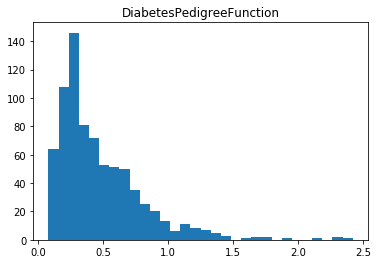

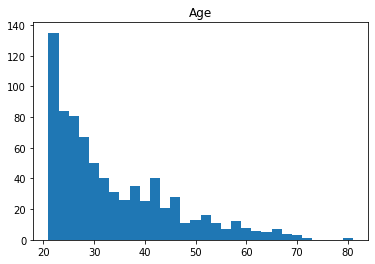

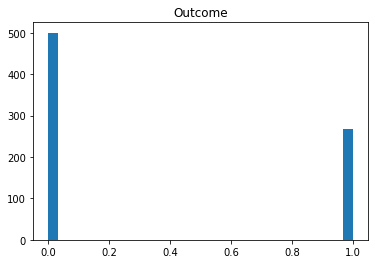

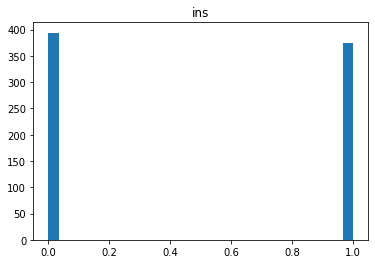

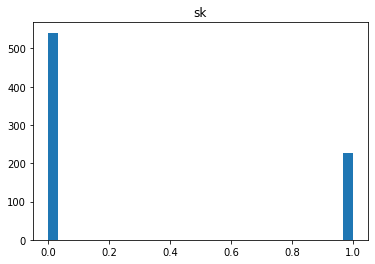

In [8]:
for i in df.columns:
    plt.figure()
    plt.title(i)
    plt.hist(df[i],bins=30)
    plt.show()

In [9]:
print(df1.groupby("Outcome")["SkinThickness"].mean())
df1=df[df["SkinThickness"]!=0]
a=df1.groupby("Outcome")["SkinThickness"].mean()[0]
print(a)
b=df1.groupby("Outcome")["SkinThickness"].mean()[1]
df1=df[df["Insulin"]!=0]
c=df1.groupby("Outcome")["Insulin"].mean()[0]

d=df1.groupby("Outcome")["Insulin"].mean()[1]


Outcome
0    19.664000
1    22.164179
Name: SkinThickness, dtype: float64
27.235457063711912


In [10]:

#df.loc[(df['First_name'] == 'Bill') | (df['First_name'] == 'Emma'), 'name_match'] = 'Match'  
df.loc[(df["SkinThickness"]==0 )&( df["Outcome"]==1),"SkinThickness"]=b
df.loc[(df["SkinThickness"]==0 )&( df["Outcome"]==0),"SkinThickness"]=a
df.loc[(df["SkinThickness"]==0 )&( df["Outcome"]==1),"SkinThickness"]=d
df.loc[(df["SkinThickness"]==0 )&( df["Outcome"]==0),"SkinThickness"]=c


In [11]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,ins,sk
0,6,148.0,72.0,35.0,0,33.6,0.627,50,1,1,0
1,1,85.0,66.0,29.0,0,26.6,0.351,31,0,1,0
2,8,183.0,64.0,33.0,0,23.3,0.672,32,1,1,1
3,1,89.0,66.0,23.0,94,28.1,0.167,21,0,0,0
4,0,137.0,40.0,35.0,168,43.1,2.288,33,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.0,180,32.9,0.171,63,0,0,0
764,2,122.0,70.0,27.0,0,36.8,0.340,27,0,1,0
765,5,121.0,72.0,23.0,112,26.2,0.245,30,0,0,0
766,1,126.0,60.0,33.0,0,30.1,0.349,47,1,1,1


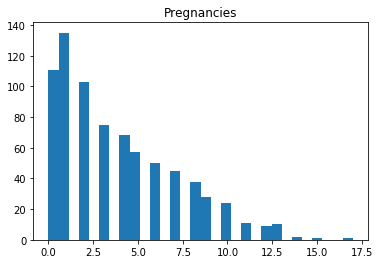

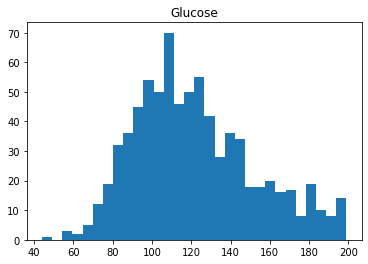

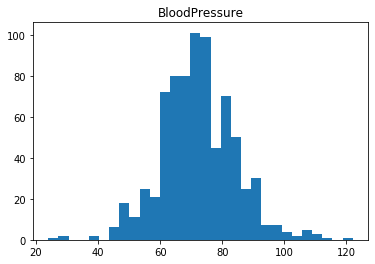

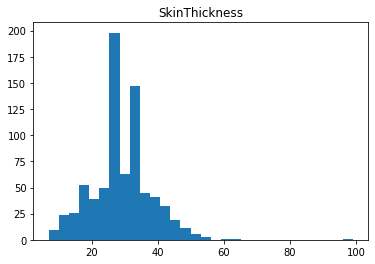

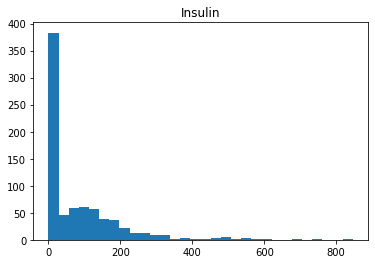

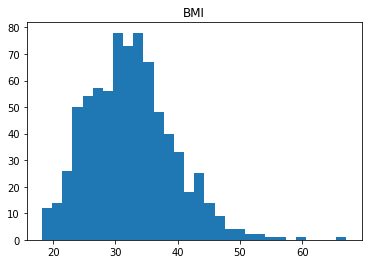

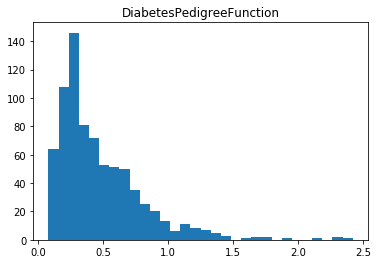

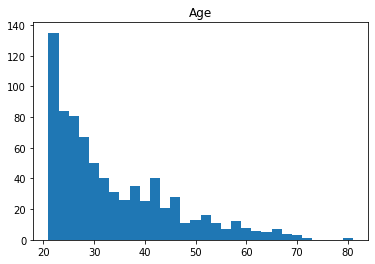

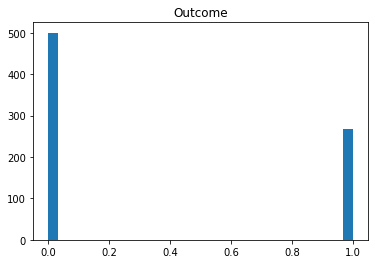

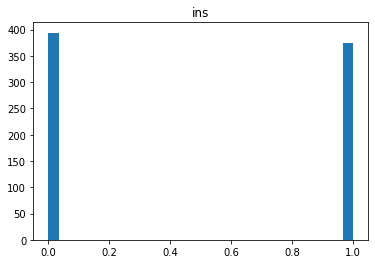

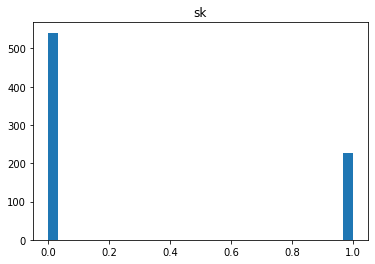

In [12]:
for i in df.columns:
    plt.figure()
    plt.title(i)
    plt.hist(df[i],bins=30)
    plt.show()

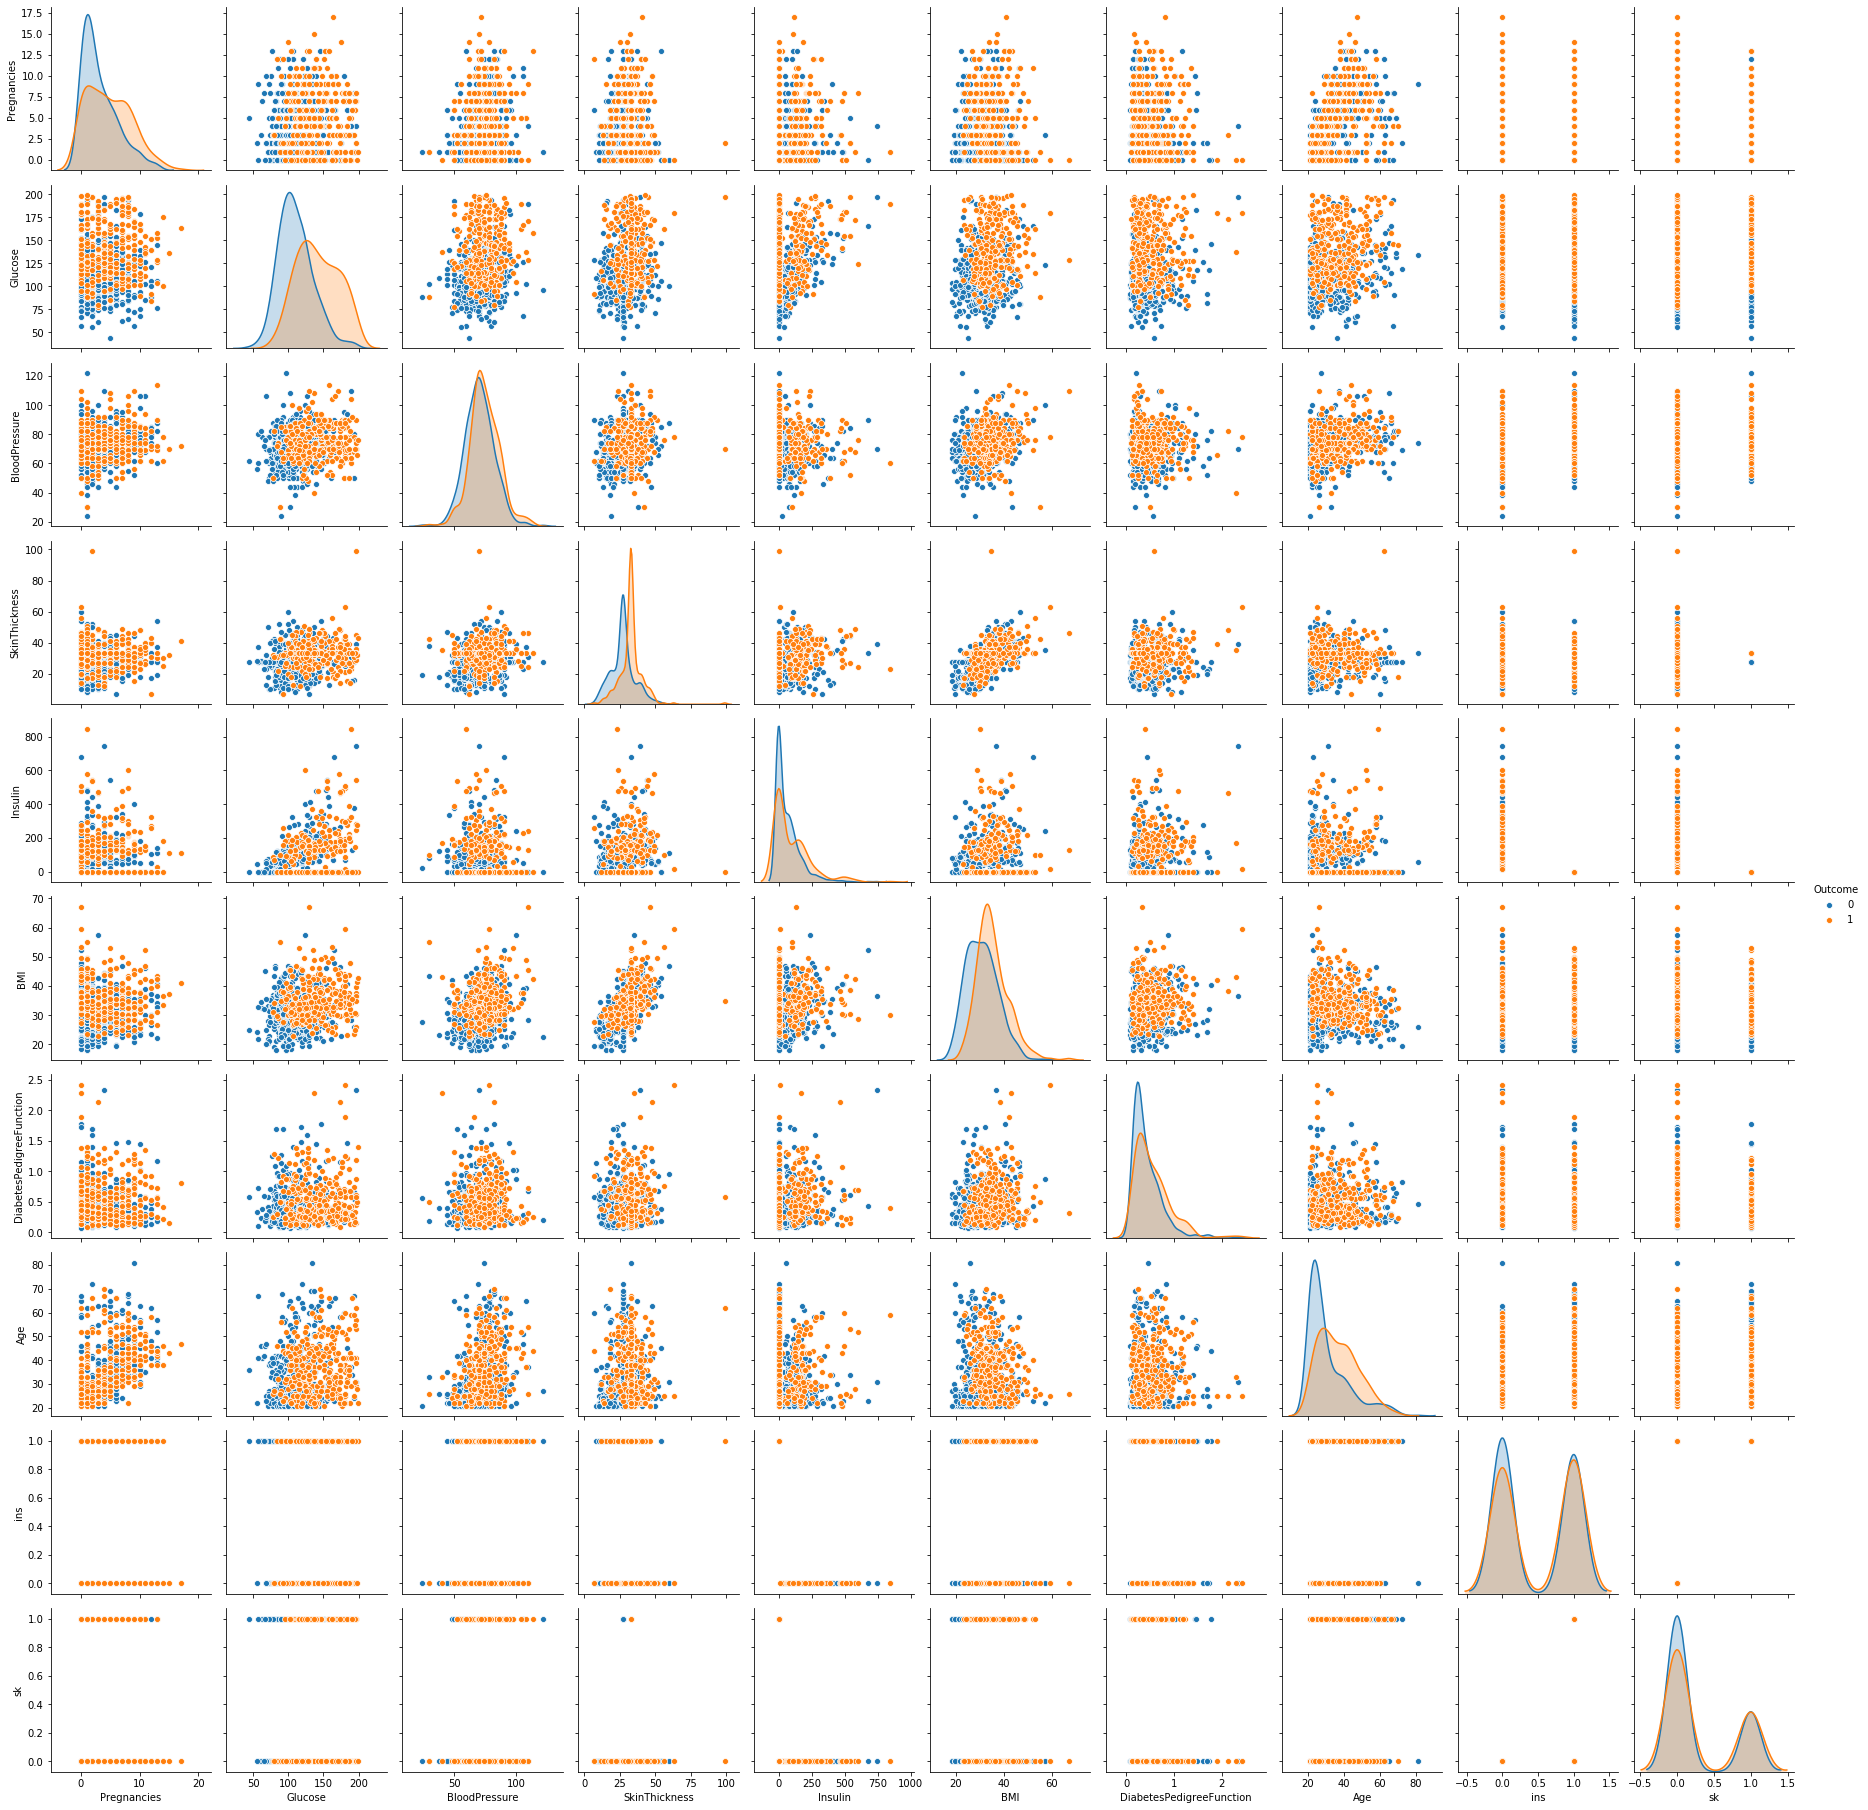

In [13]:
sns.pairplot(df,hue="Outcome")

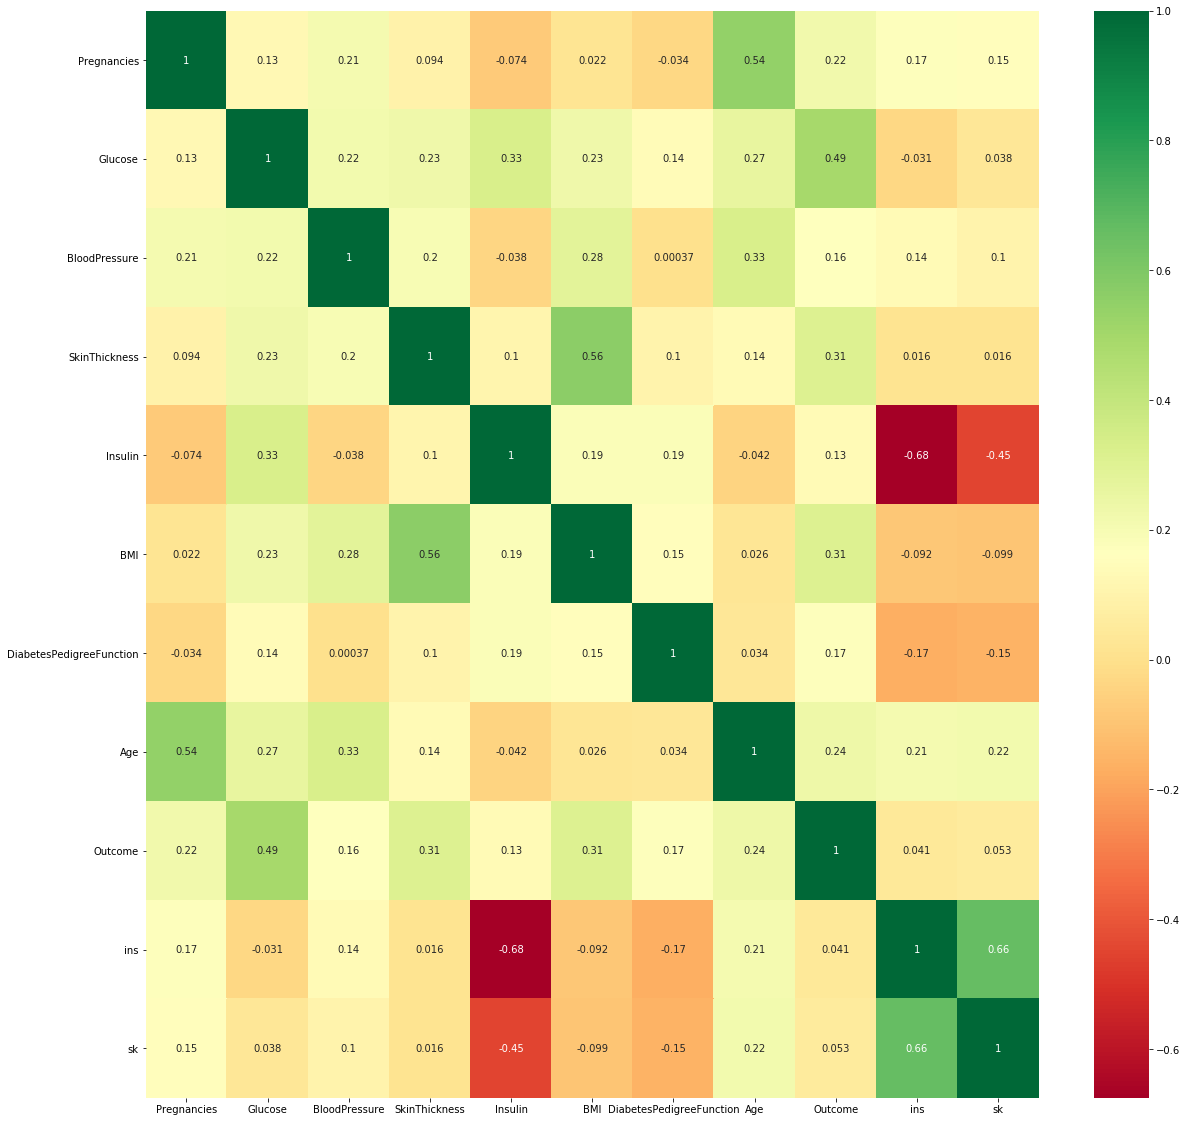

In [14]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),cmap="RdYlGn",annot=True)

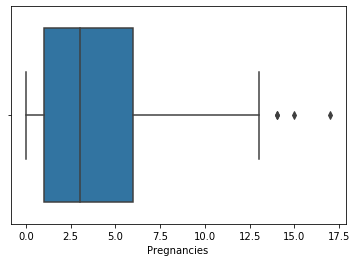

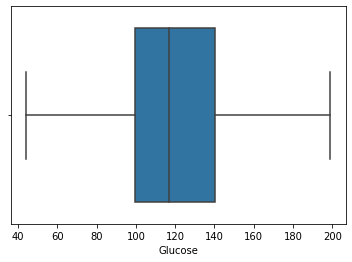

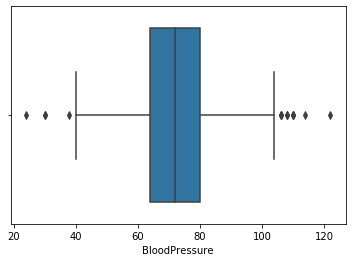

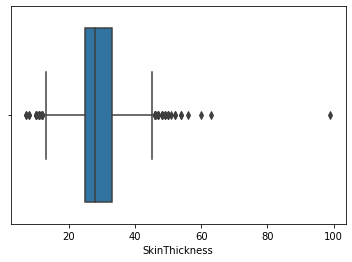

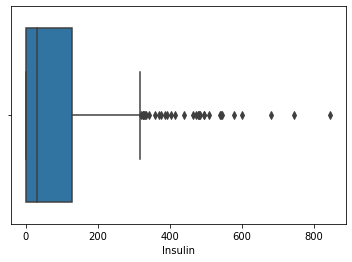

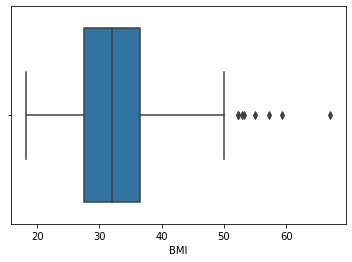

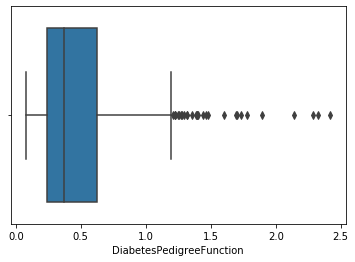

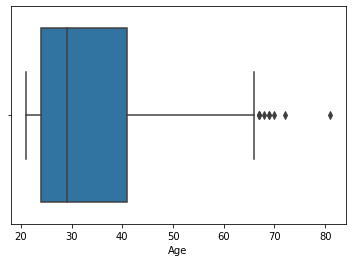

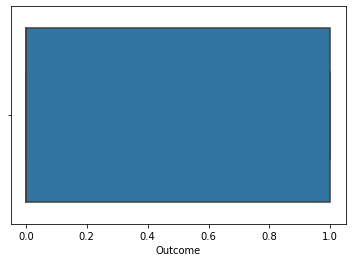

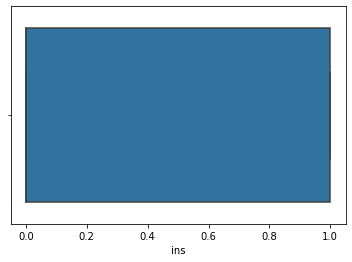

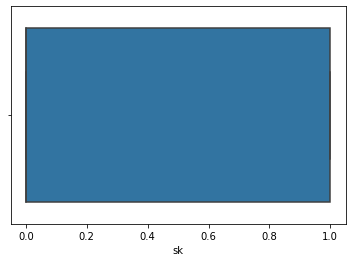

In [15]:
for fet in df.columns:
    plt.figure()
    sns.boxplot(df[fet])
    plt.show()

In [16]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)
df = df[~((df < (Q1 - 3 * IQR)) |(df > (Q3 + 3 * IQR))).any(axis=1)]

Pregnancies                   5.0000
Glucose                      40.5000
BloodPressure                16.0000
SkinThickness                 8.0000
Insulin                     127.2500
BMI                           9.1000
DiabetesPedigreeFunction      0.3825
Age                          17.0000
Outcome                       1.0000
ins                           1.0000
sk                            1.0000
dtype: float64


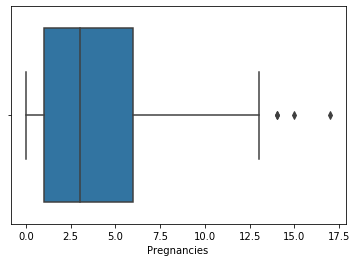

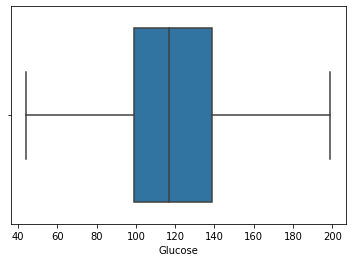

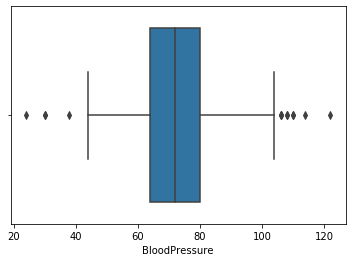

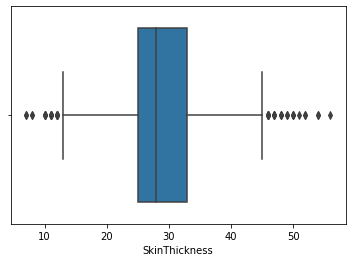

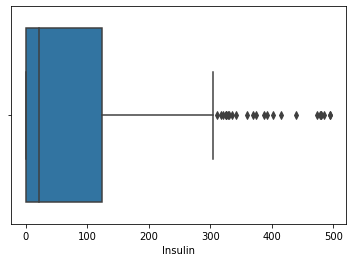

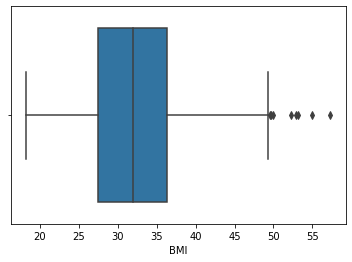

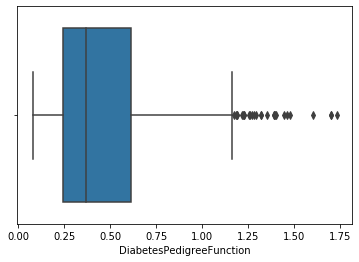

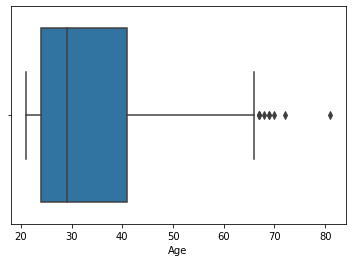

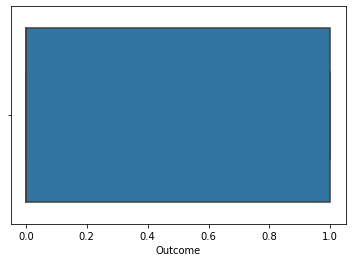

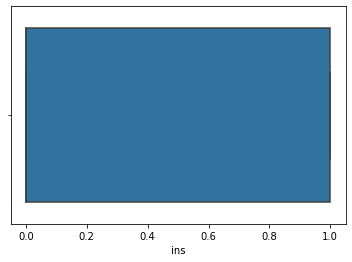

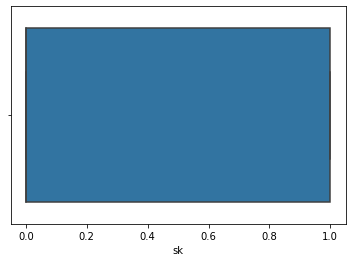

In [17]:
for fet in df.columns:
    plt.figure()
    sns.boxplot(df[fet])
    plt.show()

In [18]:
a=['DiabetesPedigreeFunction', 'Age', 'Insulin','Pregnancies']


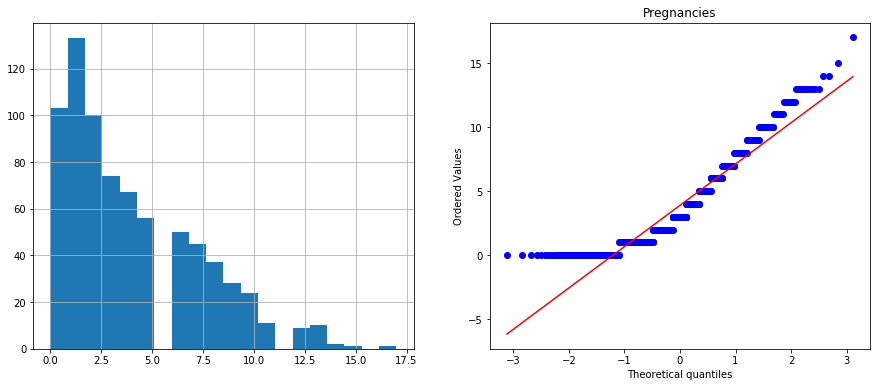

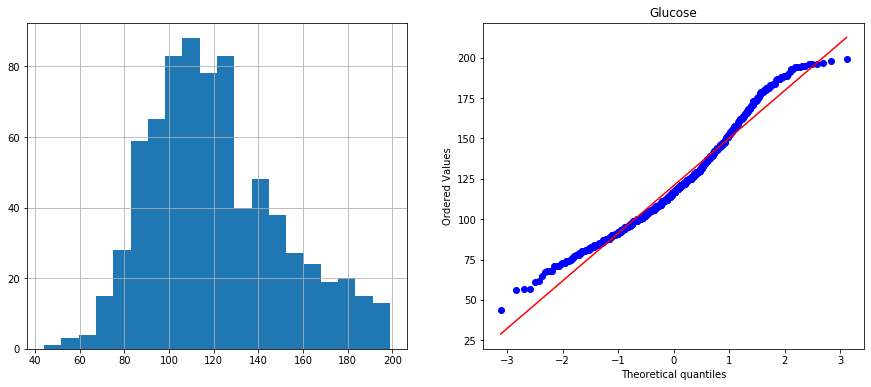

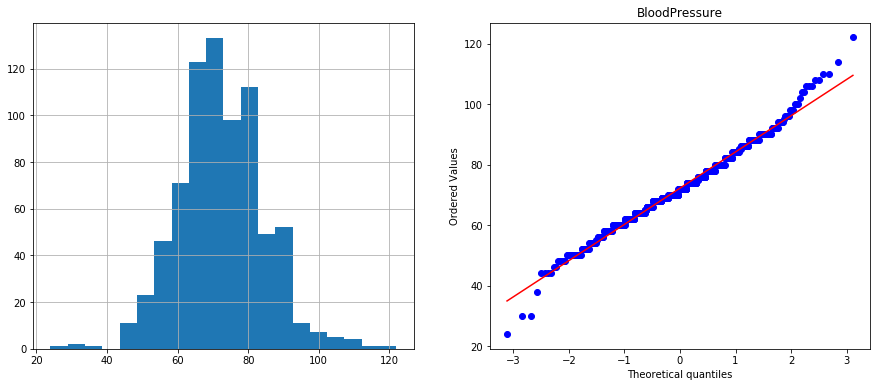

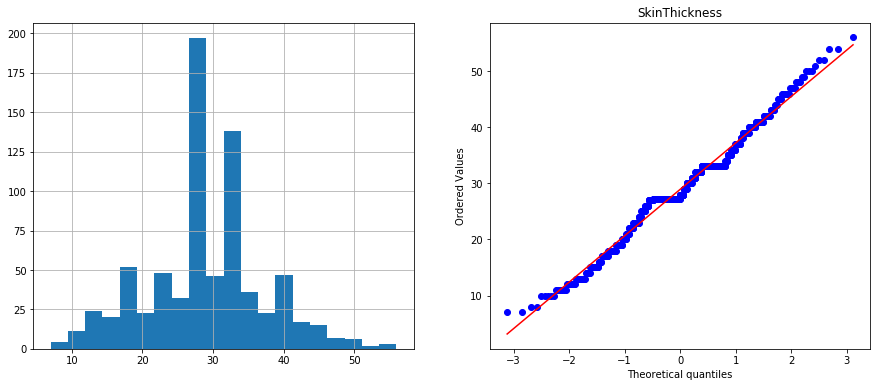

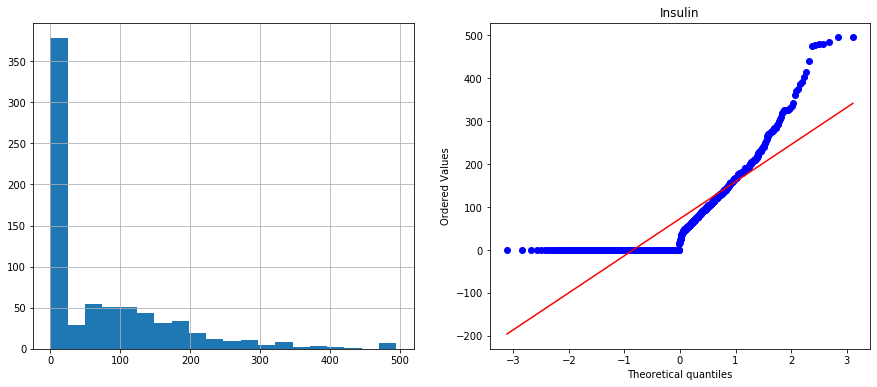

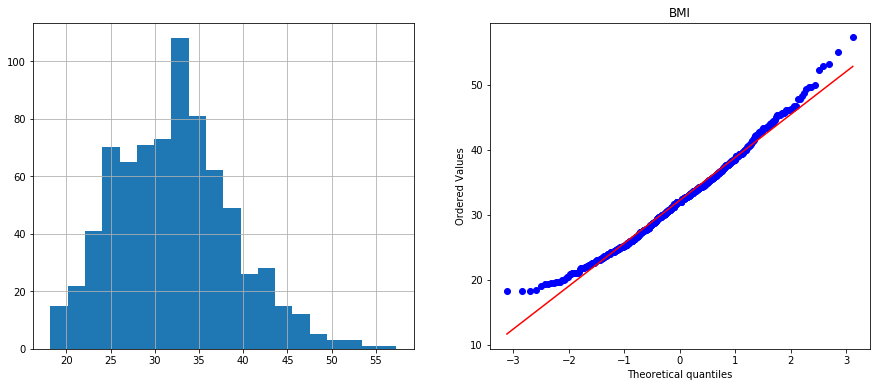

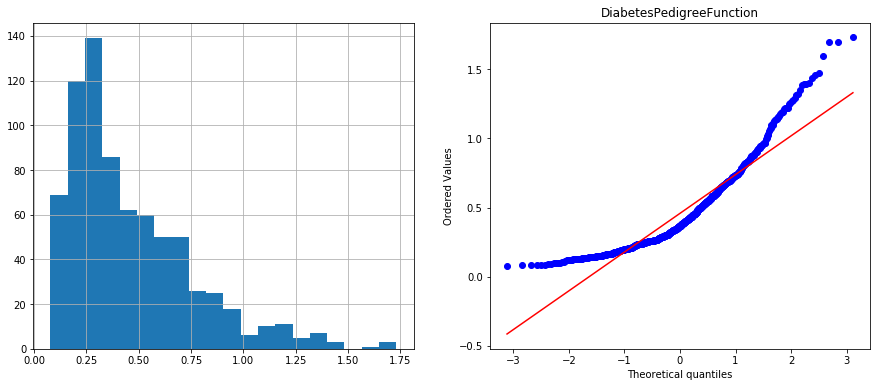

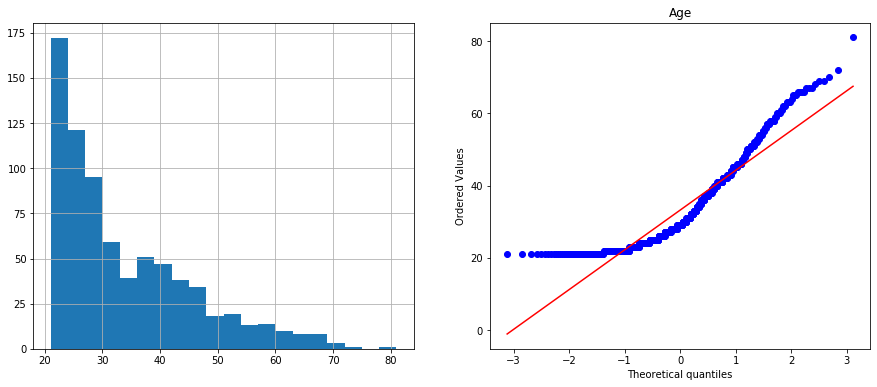

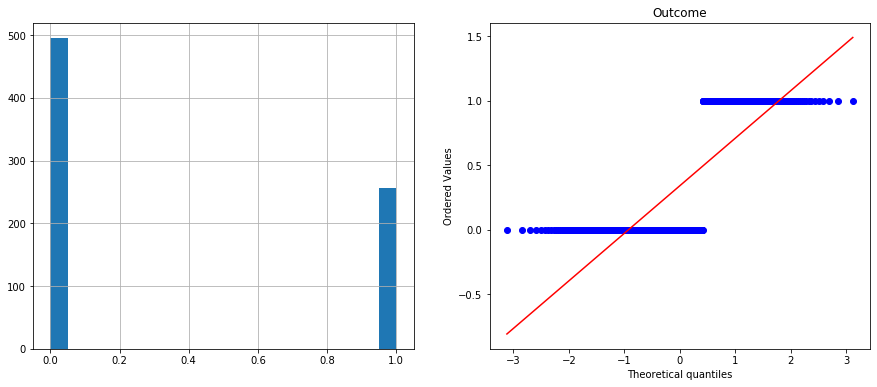

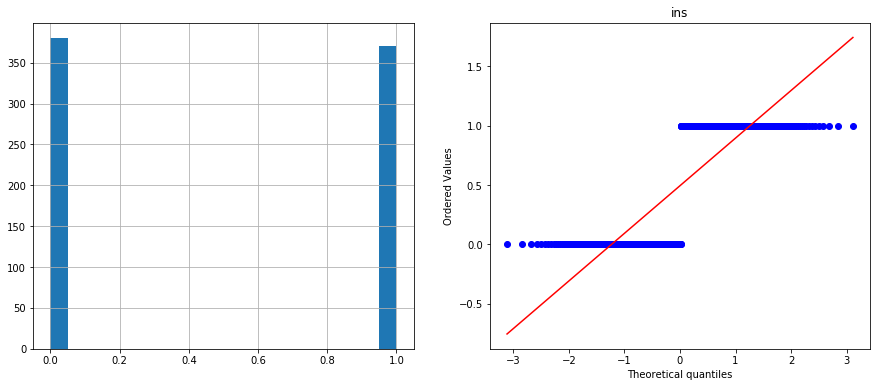

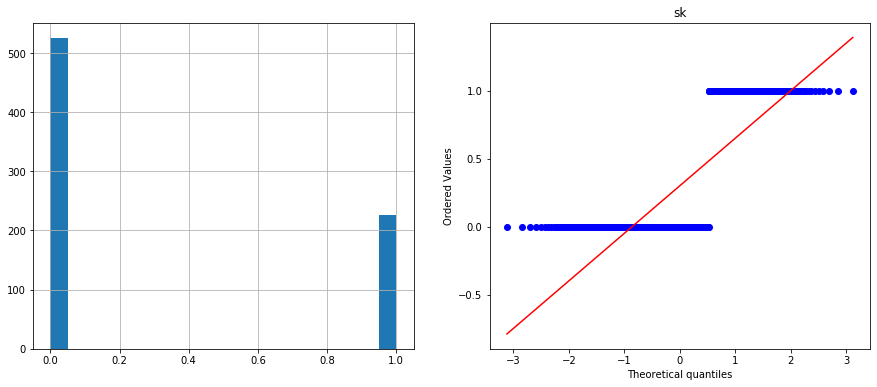

In [19]:
def diagnostic_plots(df, variable):
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    df[variable].hist(bins=20)
    plt.subplot(1, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.title(variable)
    plt.show()
for i in df.columns:
    diagnostic_plots(df, i)

C:\Users\abhiv\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


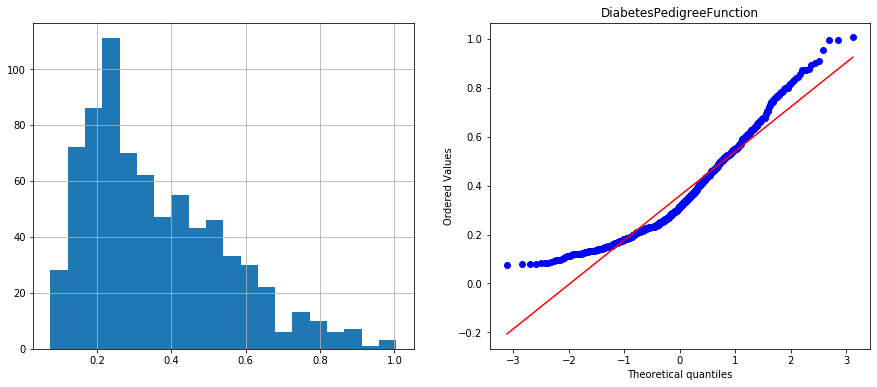

C:\Users\abhiv\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


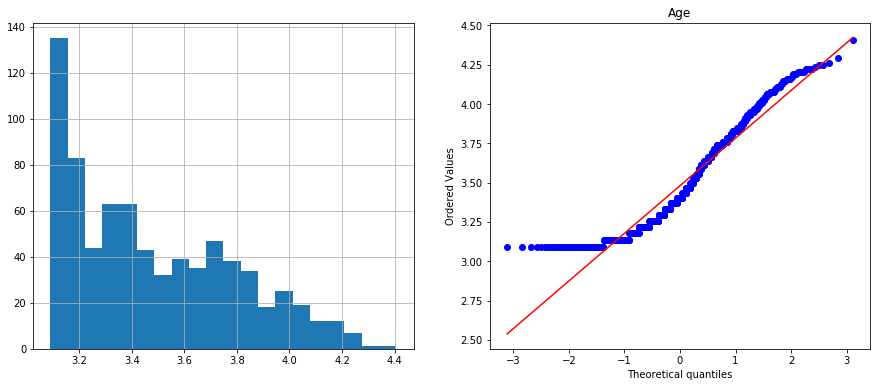

C:\Users\abhiv\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


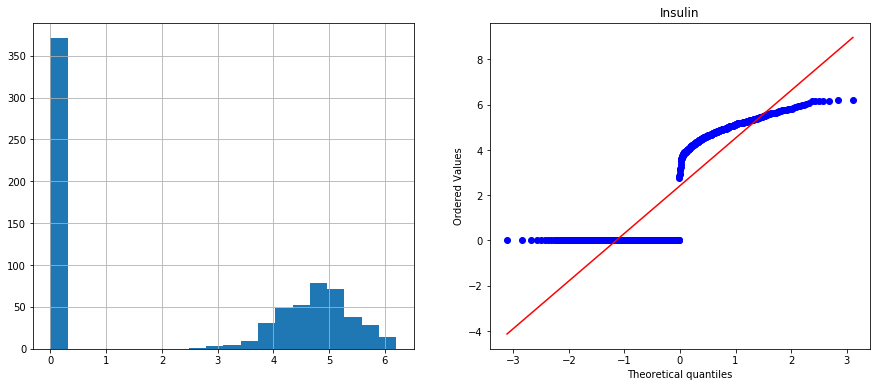

C:\Users\abhiv\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


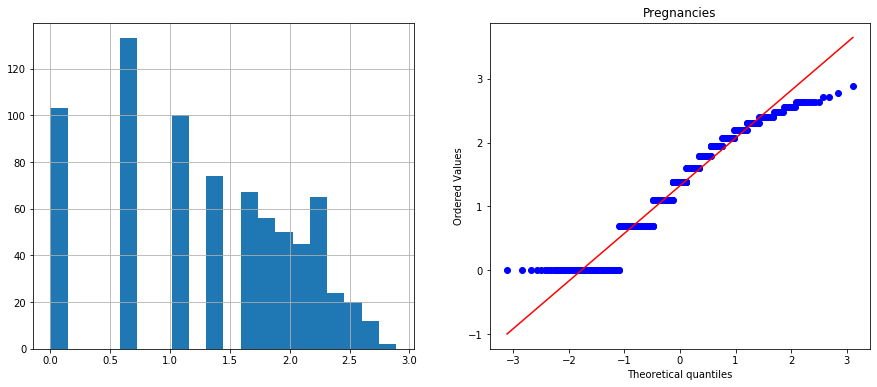

In [20]:
for i in a:
    df[i]=np.log(df[i]+1)
    diagnostic_plots(df,i)

In [21]:
x=df.drop("Outcome",axis=1)
y=df["Outcome"]
from sklearn.preprocessing import MinMaxScaler 
scl=MinMaxScaler()
x=scl.fit_transform(df.drop("Outcome",axis=1))

# Logistic Regression

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score 
clf1=LogisticRegression()
cross_val_score(clf1,x,y,cv=20).mean()


0.7682432432432433

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score
from sklearn.metrics import f1_score
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42)
from sklearn.model_selection import GridSearchCV

for i in [0.1,0.5,1,2,3,5,10,50,100]:
    clf2 = LogisticRegression(C=i)
#grid_clf_acc = GridSearchCV(clf1, param_grid = grid_values,scoring = {'Accuracy': 'accuracy'})
    clf2.fit(x_train, y_train)
    print(str(i) +"value")
    

#Predict values based on new parameters

#

#print(list(zip(y_test,y_score)))
    y_pred=clf2.predict(x_test)
    print(confusion_matrix(y_test,y_pred))
    print(accuracy_score(y_test, y_pred))
    print(f1_score(y_test, y_pred,average=None))
    print("______________________________________________________")

0.1value
[[119   6]
 [ 43  20]]
0.7393617021276596
[0.82926829 0.4494382 ]
______________________________________________________
0.5value
[[109  16]
 [ 29  34]]
0.7606382978723404
[0.82889734 0.60176991]
______________________________________________________
1value
[[108  17]
 [ 28  35]]
0.7606382978723404
[0.82758621 0.60869565]
______________________________________________________
2value
[[108  17]
 [ 29  34]]
0.7553191489361702
[0.82442748 0.59649123]
______________________________________________________
3value
[[108  17]
 [ 29  34]]
0.7553191489361702
[0.82442748 0.59649123]
______________________________________________________
5value
[[108  17]
 [ 29  34]]
0.7553191489361702
[0.82442748 0.59649123]
______________________________________________________
10value
[[106  19]
 [ 29  34]]
0.7446808510638298
[0.81538462 0.5862069 ]
______________________________________________________
50value
[[105  20]
 [ 29  34]]
0.7393617021276596
[0.81081081 0.58119658]
_________________________

In [24]:
import pickle
clf2 = LogisticRegression(C=2)
clf2.fit(x, y)
pickle.dump(clf2, open('model.pkl','wb'))
model = pickle.load(open('model.pkl','rb'))
#print(clf2.predict([[9,102,76,37,0,32.9,0.665,46]]))


# K N N

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001A9C7084788>,
      dtype=object)

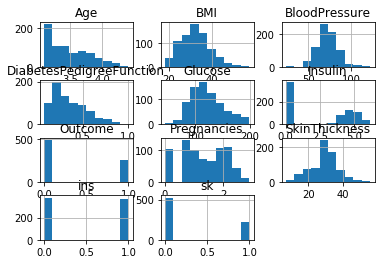

In [25]:
df.hist()

In [26]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,ins,sk
0,1.945910,148.0,72.0,35.000000,0.000000,33.6,0.486738,3.931826,1,1,0
1,0.693147,85.0,66.0,29.000000,0.000000,26.6,0.300845,3.465736,0,1,0
2,2.197225,183.0,64.0,33.000000,0.000000,23.3,0.514021,3.496508,1,1,1
3,0.693147,89.0,66.0,23.000000,4.553877,28.1,0.154436,3.091042,0,0,0
5,1.791759,116.0,74.0,27.235457,0.000000,25.6,0.183155,3.433987,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
763,2.397895,101.0,76.0,48.000000,5.198497,32.9,0.157858,4.158883,0,0,0
764,1.098612,122.0,70.0,27.000000,0.000000,36.8,0.292670,3.332205,0,1,0
765,1.791759,121.0,72.0,23.000000,4.727388,26.2,0.219136,3.433987,0,0,0
766,0.693147,126.0,60.0,33.000000,0.000000,30.1,0.299364,3.871201,1,1,1


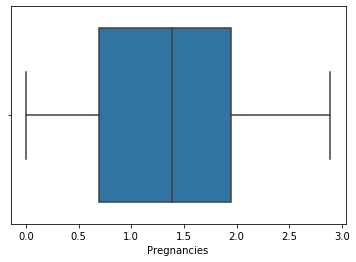

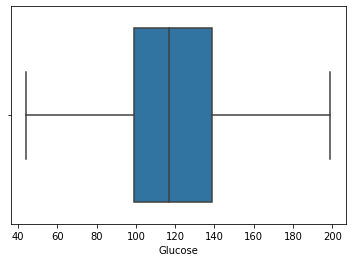

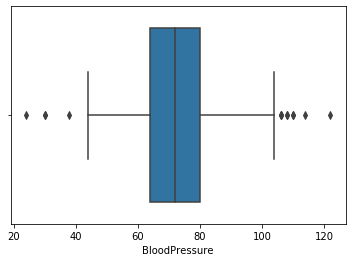

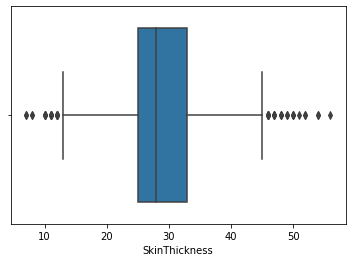

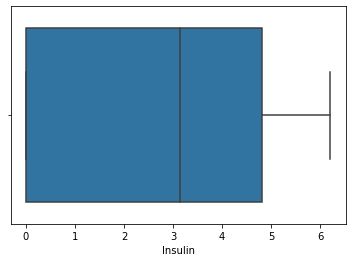

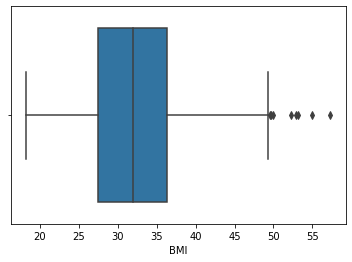

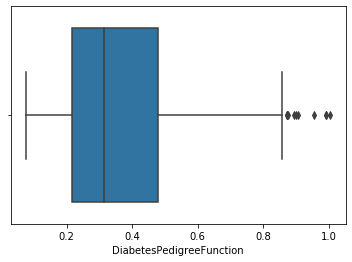

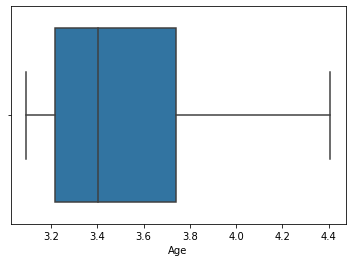

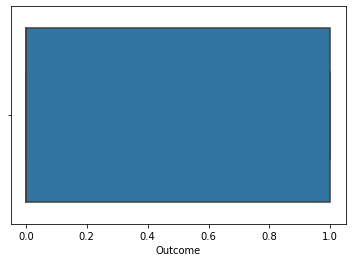

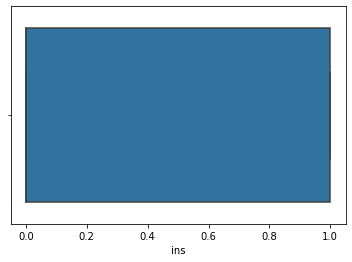

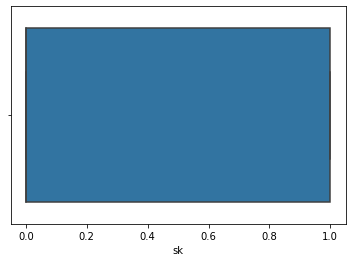

In [27]:
for fet in df.columns:
    plt.figure()
    sns.boxplot(df[fet])
    plt.show()

In [28]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,ins,sk
0,1.945910,148.0,72.0,35.000000,0.000000,33.6,0.486738,3.931826,1,1,0
1,0.693147,85.0,66.0,29.000000,0.000000,26.6,0.300845,3.465736,0,1,0
2,2.197225,183.0,64.0,33.000000,0.000000,23.3,0.514021,3.496508,1,1,1
3,0.693147,89.0,66.0,23.000000,4.553877,28.1,0.154436,3.091042,0,0,0
5,1.791759,116.0,74.0,27.235457,0.000000,25.6,0.183155,3.433987,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
763,2.397895,101.0,76.0,48.000000,5.198497,32.9,0.157858,4.158883,0,0,0
764,1.098612,122.0,70.0,27.000000,0.000000,36.8,0.292670,3.332205,0,1,0
765,1.791759,121.0,72.0,23.000000,4.727388,26.2,0.219136,3.433987,0,0,0
766,0.693147,126.0,60.0,33.000000,0.000000,30.1,0.299364,3.871201,1,1,1


In [29]:
x=df.drop("Outcome",axis=1)
y=df["Outcome"]
from sklearn.neighbors import KNeighborsClassifier as knn
for i in [3,5,7,9,11,15,21]: 
    clf2=knn(n_neighbors=i)
    print(cross_val_score(clf2,x,y,cv=10).mean())

0.780280701754386
0.7536491228070175
0.7576315789473684
0.7483333333333333
0.7496842105263158
0.7616842105263157
0.7670175438596492


In [30]:
from sklearn.preprocessing import MinMaxScaler 
scl=MinMaxScaler()
x=scl.fit_transform(df.iloc[:,:])
for i in [3,5,7,9,11,15,19,21,25,27]: 
    clf3=knn(n_neighbors=i)
    print(cross_val_score(clf3,x,y,cv=10).mean())

1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0


# Random Forest

In [31]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
x=df.drop("Outcome",axis=1)
y=df["Outcome"]
clf3=RandomForestClassifier()
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42)
#clf.fit(x,y)
cross_val_score(clf3,x,y,cv=10).mean()

0.833561403508772

In [32]:

from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [33]:
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(x, y)
rf_random.best_params_

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   27.0s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  3.7min finished


{'n_estimators': 600,
 'min_samples_split': 10,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 40,
 'bootstrap': False}

In [34]:
rf = RandomForestClassifier(n_estimators= 1600,
 min_samples_split= 2,
 min_samples_leaf= 4,
 max_features= 'sqrt',
 max_depth= 10,
 bootstrap= True)
cross_val_score(rf,x,y,cv=10).mean()

0.8522280701754387

In [38]:
import pickle
clf2 = rf
clf2.fit(x, y)
pickle.dump(clf2, open('model.pkl','wb'))
model = pickle.load(open('model.pkl','rb'))
#print(clf2.predict([[1	,93	,70	,31	,0	,30.4	,0.315,	23]]))

In [36]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,ins,sk
0,1.945910,148.0,72.0,35.000000,0.000000,33.6,0.486738,3.931826,1,1,0
1,0.693147,85.0,66.0,29.000000,0.000000,26.6,0.300845,3.465736,0,1,0
2,2.197225,183.0,64.0,33.000000,0.000000,23.3,0.514021,3.496508,1,1,1
3,0.693147,89.0,66.0,23.000000,4.553877,28.1,0.154436,3.091042,0,0,0
5,1.791759,116.0,74.0,27.235457,0.000000,25.6,0.183155,3.433987,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
763,2.397895,101.0,76.0,48.000000,5.198497,32.9,0.157858,4.158883,0,0,0
764,1.098612,122.0,70.0,27.000000,0.000000,36.8,0.292670,3.332205,0,1,0
765,1.791759,121.0,72.0,23.000000,4.727388,26.2,0.219136,3.433987,0,0,0
766,0.693147,126.0,60.0,33.000000,0.000000,30.1,0.299364,3.871201,1,1,1


In [37]:
df.head(30)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,ins,sk
0,1.945910,148.0,72.000000,35.000000,0.000000,33.600000,0.486738,3.931826,1,1,0
1,0.693147,85.0,66.000000,29.000000,0.000000,26.600000,0.300845,3.465736,0,1,0
2,2.197225,183.0,64.000000,33.000000,0.000000,23.300000,0.514021,3.496508,1,1,1
3,0.693147,89.0,66.000000,23.000000,4.553877,28.100000,0.154436,3.091042,0,0,0
5,1.791759,116.0,74.000000,27.235457,0.000000,25.600000,0.183155,3.433987,0,1,1
6,1.386294,78.0,50.000000,32.000000,4.488636,31.000000,0.221542,3.295837,1,0,0
7,2.397895,115.0,69.105469,27.235457,0.000000,35.300000,0.125751,3.401197,0,1,1
9,2.197225,125.0,96.000000,33.000000,0.000000,31.992578,0.208639,4.007333,1,1,1
10,1.609438,110.0,92.000000,27.235457,0.000000,37.600000,0.174793,3.433987,0,1,1
11,2.397895,168.0,74.000000,33.000000,0.000000,38.000000,0.429832,3.555348,1,1,1
